In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean

%matplotlib inline

In [2]:
grid=xr.open_dataset('/mnt/meom/MODEL_SET/eNATL60/eNATL60-I/mesh_mask_eNATL60_3.6.nc')
navlon=grid['nav_lon']
navlat=grid['nav_lat']
mask=grid['tmask'][0,0]
mask_mask=ma.masked_where(mask==0.,mask)

/mnt/meom/workdir/albert/anaconda2/envs/simple-map/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/mnt/meom/workdir/albert/anaconda2/envs/simple-map/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


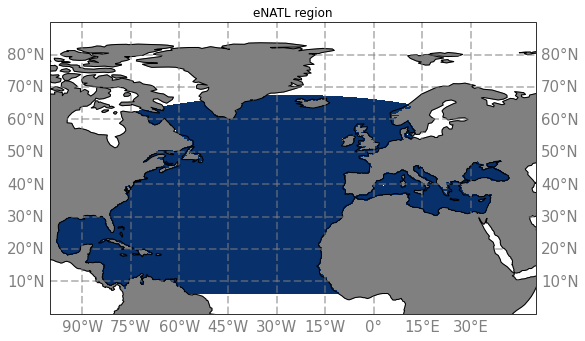

In [3]:
fig = plt.figure(figsize=(22,10))

ax = fig.add_subplot(121,projection=ccrs.PlateCarree(central_longitude=-30))
ax.autoscale(tight=True)
pcolor=ax.pcolormesh(navlon,navlat,mask_mask,transform=ccrs.PlateCarree(),cmap='Blues',vmin=0,vmax=1)

ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
extent = [-100, 50, 0, 90]
ax.set_extent(extent)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(-90,40,15))
gl.ylocator = mticker.FixedLocator(np.arange(0,90,10))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
#gl.ylabels_right = False
gl.xlabels_top = False
fig.subplots_adjust(right=0.8)

plt.title('eNATL region')
plt.savefig('region_eNATL.png', bbox_inches='tight')